# Homework 1 - data validation & cleaning (deadline 16. 11. 2025, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.

> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels!
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_

All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution.

**If you do all this properly, you will obtain 20 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [3]:
data = pd.read_csv('data/MetObjects.csv', low_memory=False)
data.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


=== BASIC SHAPE ===
Rows: 484,956, Columns: 54

=== DATA TYPES (grouped) ===
object     47
bool        3
int64       3
float64     1
Name: count, dtype: int64

=== MISSING VALUES (top 30 by % missing) ===


,missing_ratio
Metadata Date,1.000000
River,0.995686
State,0.994595
Locus,0.984498
County,0.982351
Reign,0.976831
Locale,0.967546
Excavation,0.965830
Subregion,0.954340
Dynasty,0.952159



=== CARDINALITY (top 30 by number of unique values) ===


,n_unique
Object ID,484956
Link Resource,484956
Object Number,481656
Dimensions,264987
Title,245801
Object Wikidata URL,69077
Artist Display Name,66950
Artist Alpha Sort,66888
Medium,65908
Artist Display Bio,54659



=== BASIC NUMERIC SUMMARY ===


,count,mean,std,min,25%,50%,75%,max
Object ID,484956.0,394499.940353,242732.561637,1.0,212379.75,374771.5,570971.25,900748.0
Object Begin Date,484956.0,1303.913734,1710.259182,-400000.0,1535.00,1800.0,1891.00,5000.0
Object End Date,484956.0,1402.978142,1132.101347,-240000.0,1593.00,1840.0,1905.00,2870.0
Metadata Date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== BASIC CATEGORICAL SUMMARY (top categories) ===

--- Object Number ---


,count
Object Number,
62.635,4
24.59.2,3
31.67.12,3
25.2.13,3
36.11.10,3
32.64.11,3
31.82.5,3
36.15,3
31.43.1,3



--- Gallery Number ---


,count
Gallery Number,
NaN,435415
774,7547
122,4495
171,3481
109,2967
130,2276
117,2263
106,1167
126,873



--- Department ---


,count
Department,
Drawings and Prints,172630
European Sculpture and Decorative Arts,43051
Photographs,37459
Asian Art,37000
Greek and Roman Art,33726
Costume Institute,31652
Egyptian Art,27969
The American Wing,18532
Islamic Art,15573



--- AccessionYear ---


,count
AccessionYear,
1963,41980
2011,18617
1917,12568
1994,10597
2009,9385
1936,9188
1926,7374
1953,7231
1923,6853



--- Object Name ---


,count
Object Name,
Print,102986
Photograph,29451
Drawing,26018
Book,13397
Kylix fragment,8926
Piece,8621
Fragment,7213
Painting,6014
Negative,5928



--- Title ---


,count
Title,
NaN,28803
Terracotta fragment of a kylix (drinking cup),6415
Piece,4670
Fragment,3362
Dress,2513
Ensemble,2026
Terracotta rim fragment of a kylix (drinking cup),1839
Textile Fragment,1826
Bowl,1799



--- Culture ---


,count
Culture,
NaN,276766
American,28579
French,18435
"Greek, Attic",17309
Japan,16939
China,13504
Italian,6526
Japanese,5990
British,5476



--- Period ---


,count
Period,
NaN,393813
Edo period (1615–1868),9127
Archaic,7719
New Kingdom,6965
Classical,6954
Middle Kingdom,4668
Qing dynasty (1644–1911),4437
"New Kingdom, Ramesside",3745
Archaic/Classical,1967



--- Dynasty ---


,count
Dynasty,
NaN,461755
Dynasty 18,7184
Dynasty 12,2099
Dynasty 19–20,2019
Dynasty 12–13,1231
Dynasty 19,1150
Dynasty 21,902
Dynasty 26–30,839
Dynasty 26,666



--- Reign ---


,count
Reign,
NaN,473720
reign of Amenhotep III,2750
"reign of Amenemhat I, early",1220
Joint reign of Hatshepsut and Thutmose III,960
reign of Akhenaten,917
reign of Ramesses II,510
reign of Thutmose III,453
reign of Ramesses IV,443
reign of Psamtik I,399


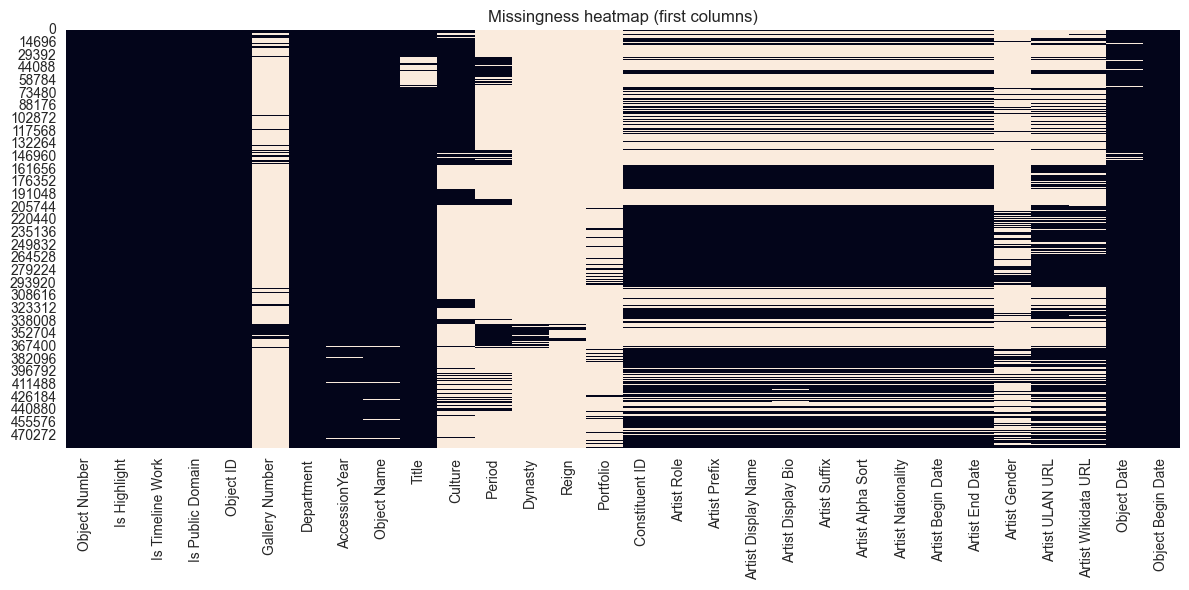

In [4]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

def eda_overview(df: pd.DataFrame, n_top_cat: int = 10):
    print("=== BASIC SHAPE ===")
    print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]:,}")
    print()

    print("=== DATA TYPES (grouped) ===")
    print(df.dtypes.value_counts())
    print()

    print("=== MISSING VALUES (top 30 by % missing) ===")
    missing = df.isna().mean().sort_values(ascending=False)
    display(missing.head(30).to_frame("missing_ratio"))
    print()

    print("=== CARDINALITY (top 30 by number of unique values) ===")
    nunique = df.nunique(dropna=False).sort_values(ascending=False)
    display(nunique.head(30).to_frame("n_unique"))
    print()

    print("=== BASIC NUMERIC SUMMARY ===")
    display(df.select_dtypes(include=[np.number]).describe().T)
    print()

    print("=== BASIC CATEGORICAL SUMMARY (top categories) ===")
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    for col in cat_cols[:n_top_cat]:
        print(f"\n--- {col} ---")
        vc = df[col].value_counts(dropna=False).head(10)
        display(vc.to_frame("count"))

def plot_missingness_heatmap(df: pd.DataFrame, max_cols: int = 30):
    cols = df.columns[:max_cols]
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[cols].isna(), cbar=False)
    plt.title("Missingness heatmap (first columns)")
    plt.tight_layout()
    plt.show()

# Run EDA
eda_overview(data)
plot_missingness_heatmap(data)

2. Check the consistency of at least three features where you expect problems (Object Name, Medium, AccesionYear). You can propose how to clean the selected features. However, do not apply cleaning.:
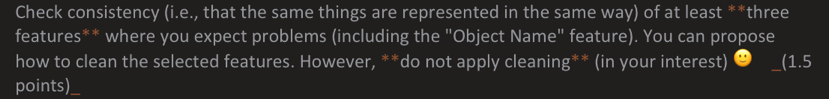

In [5]:
def display_inconsistency_name(df: pd.DataFrame, col: str, word: str):
    unique_sorted = np.sort(df[col].dropna().unique())
    s = pd.Series(unique_sorted).astype(str)
    matches = s[s.str.contains(word, case=False, na=False)]

    return matches

# Example for "Object Name" containing the word "portrait"
object_name_inconsistencies = display_inconsistency_name(data, 'Object Name', 'portrait')
object_name_inconsistencies

364                           Ambrotype portrait with case
2979                                        Book Portraits
4165                                       Cameo, portrait
4166                           Cameo, portrait of Augustus
5106     Cippus (upper part) with three portrait heads ...
10456    Grave relief fragment, portraits of young man ...
10458            Grave relief fragment, two portrait busts
11181                              Head of a man, portrait
12207                   Intaglio portrait of a young woman
12228                         Intaglio, male portrait head
12230                    Intaglio, portrait of Julia Domna
12231                      Intaglio, portrait of Vespasian
14369                                 Mask, youth portrait
14632                             Millefiori portrait bead
15484                         Mummy, youth, panel portrait
18366                                             Portrait
18367                                   Portrait Medalli

In [6]:
# Example for "Medium" containing the word "portrait"
medium_inconsistencies = display_inconsistency_name(data, 'Medium', 'gold')
medium_inconsistencies

4                                    \r\nCarnelian\r\nGold
6        \r\nCopper-silver alloy (shibuichi), copper-go...
69       (a) White metal / brocaded\r\n(b) Silk / Broca...
159                                               (a) gold
160                                (a) gold\r\n(b) leather
                               ...                        
65327                                    wood, ivory, gold
65356                   wood, metal, enamel, gold, leather
65605                                     wool, gold, horn
65606                                     wool, gold, silk
65789                                     wool, silk, gold
Length: 6558, dtype: object

In [7]:
# prepare series, count exact-4 and >4 character rows
ser = data['AccessionYear'].dropna().astype(str).str.strip()
exact_4 = (ser.str.len() == 4).sum()
more_than_4 = (ser.str.len() > 4).sum()
less_than_4 = (ser.str.len() < 4).sum()
print("Non-null rows:", ser.shape[0])
print("Exactly 4 characters:", exact_4)
print("More than 4 characters:", more_than_4)
print("Less than 4 characters:", less_than_4)

Non-null rows: 481094
Exactly 4 characters: 481054
More than 4 characters: 40
Less than 4 characters: 0


For categorical features like "Object Name" and "Medium", we can see inconsistencies by looking for variations of specific keywords. For example, in "Object Name", we can look for different representations of the word "portrait". In "Medium", we can look for variations of the word "gold". Also during explanatory data analysis, we see the presence of non-English characters and inconsistent capitalization, presence of extra spaces, brackets, quotes, and punctuation marks.

For numeric features like "AccessionYear", we can see that some dates are not in the expected four-digit format. Some entries have more than four characters, indicating potential inconsistencies.

I can propose cleaning steps such as trimming extra spaces, standardizing capitalization, removing non-English characters, and ensuring that numeric fields conform to expected formats.

3. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only).

We can check the integrity between "Object Number" and "AccessionYear". The "Object Number" often contains a year or a code that can be correlated with the "AccessionYear". We can check if the year in the "Object Number" matches the "AccessionYear".

In [8]:
def count_objectnum_missing_exact_accession_year(df: pd.DataFrame,
                                                 obj_col: str = "Object Number",
                                                 acc_col: str = "AccessionYear") -> int:
    obj = df[obj_col].fillna("").astype(str)
    acc = df[acc_col].fillna("").astype(str).str.strip()

    # valid accession years: 2 to 4 digits
    valid_mask = acc.str.match(r"^\d{2,4}$", na=False)

    def has_exact_token(o: str, a: str) -> bool:
        if not a.isdigit():
            return False
        # match the accession year as a standalone digit sequence (not part of a longer number)
        pattern = rf"(?<!\d){re.escape(a)}(?!\d)"
        return re.search(pattern, o) is not None

    contains_exact = [has_exact_token(o, a) for o, a in zip(obj, acc)]
    contains_series = pd.Series(contains_exact, index=df.index)

    missing_count = int((valid_mask & (~contains_series)).sum())
    return missing_count

# Example usage:
missing = count_objectnum_missing_exact_accession_year(data)
print("Rows where Object Number does NOT contain exactly AccessionYear:", missing)

Rows where Object Number does NOT contain exactly AccessionYear: 321740


The main problem is that the year in "Object Number" can be represented in various formats (e.g., full year like "1984", two-digit year like "84", or embedded within other characters).

4. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_

- Numeric: Convert Object ID to numeric type.
- Categorical: Convert Medium and Artist Gender to categorical type.
- Datetime: Convert AccessionYear and Object Date to datetime type.


In [9]:
data_copy = data.copy()

data_copy["Object ID"] = data_copy["Object ID"].astype('int64')
data_copy["Medium"] = data_copy["Medium"].astype('category')
data_copy["Artist Gender"] = data_copy["Artist Gender"].astype('category')
data_copy["AccessionYear"] = pd.to_datetime(data_copy["AccessionYear"], format='%Y', errors='coerce')
data_copy["Object Date"] = pd.to_datetime(data_copy["Object Date"], format='%Y', errors='coerce')
data_copy[['Object ID', 'Medium', 'Artist Gender', 'AccessionYear', 'Object Date',]].dtypes

Object ID                 int64
Medium                 category
Artist Gender          category
AccessionYear    datetime64[ns]
Object Date      datetime64[ns]
dtype: object

The problem with converting "AccessionYear" and "Object Date" to datetime is that some entries may not conform to standard date formats, leading to parsing the first of January of that year or NaT (Not a Time) for invalid entries.

5. Find some outliers and describe your method. _(3 points, depends on creativity)

In [42]:
data_copy["Medium_len"] = data_copy["Medium"].astype(str).str.len()

data_copy["Medium_len"].describe()

count    484956.000000
mean         21.171168
std          21.630531
min           2.000000
25%           9.000000
50%          17.000000
75%          27.000000
max        6600.000000
Name: Medium_len, dtype: float64

In [43]:
Q1 = data_copy["Medium_len"].quantile(0.25)
Q3 = data_copy["Medium_len"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data_copy["Medium_len_outlier"] = (
    (data_copy["Medium_len"] < lower) |
    (data_copy["Medium_len"] > upper)
)

print("Share of Medium-length outliers:", data_copy["Medium_len_outlier"].mean())

Share of Medium-length outliers: 0.05473692458697284


In [44]:
display(
    data_copy.loc[data_copy["Medium_len_outlier"], ["Object Number", "Medium", "Medium_len"]]
          .head(20)
)

,Object Number,Medium,Medium_len
34,04.1a–c,gold amethysts spessartites tourmalines fresh ...,91
150,23.80.7,primary mahogany secondary cherry medial brace...,148
201,1970.35.1,rosewood prickly juniper veneer gilding brass ...,74
203,64.202.1,prima vera american ash secondary wood marquet...,98
204,64.202.2,prima vera american ash secondary wood marquet...,98
224,69.262.3,applewood or pearwood ebonized walnut beech an...,66
226,60.4.2,primary mahogany secondary cherry medial brace...,75
273,30.120.15,mahogany gilt gesso eglomise tablets white pin...,60
274,37.37.3,mahogany gilt gesso eglomise tablets white pin...,60
316,46.140.363,blown amber and colorless glass with applied t...,59


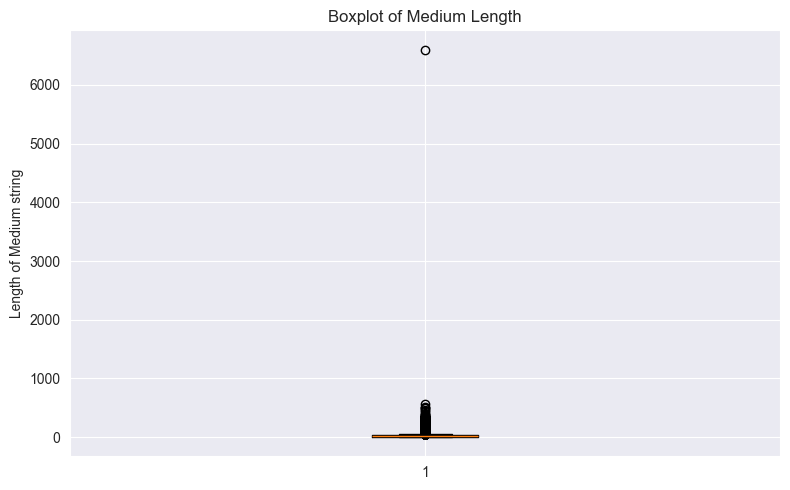

In [50]:
plt.figure(figsize=(8, 5))
plt.boxplot(data_copy["Medium_len"].dropna())
plt.title("Boxplot of Medium Length")
plt.ylabel("Length of Medium string")
plt.tight_layout()
plt.show()

In [54]:
data_copy[data_copy["Medium_len"]>50][["Object Name", "Medium", "Medium_len", 'Medium_len_outlier']].sort_values(by="Medium_len", ascending=False).head(50)

,Object Name,Medium,Medium_len,Medium_len_outlier
212050,Collection Ornament & Architecture; drawing,1 pen and brown ink brush and gray wash 2 pen ...,6600,True
478996,Print Portfolio,portfolio with a variety of print techniques i...,560,True
312637,Cope with orphrey and hood,cope silk warpfloat faced 41 satin weave with ...,509,True
310721,Drawing,pen and blackish brown ink and gray wash over ...,489,True
441681,Drawing Ornament & Architecture,31 ink watercolor and gouache on white paper o...,489,True
212215,Album,notebook of 55 pages on 29 leaves last leaf is...,467,True
311898,Watch,outer case of painted enamel on gold inner cas...,442,True
26965,Set of four pistols with case and accessories,turnover pistols steel wood walnut gold silver...,408,True
381018,Sculpture,body form torso with undergarment two plastic ...,391,True
135737,Cabinet,wood silk satin worked with silk metal threads...,383,True


We defined outliers in the "Medium" feature based on the length of the string representation. Using the Interquartile Range (IQR) method, we identified entries with lengths significantly shorter or longer than the typical range. The boxplot visualization helps to illustrate the distribution of lengths and highlights the outliers. Some outliers include extremely long descriptions or very short entries that may not provide meaningful information about the medium used.

I also inspected outliers for extracted Dimensions (Height_cm, Width_cm, Depth_cm) below the eighth task.

6. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_

In [56]:
# true missing values (NaN / NaT / <NA>)
data_copy = data.copy()
true_missing = data_copy['AccessionYear'].isna().sum()

# deal with textual `'nan'` or empty strings: cast to pandas string
s_str = data_copy['AccessionYear'].astype('string').str.strip()
string_nan = (s_str.str.lower() == 'nan').sum()
empty_strings = (s_str == '').sum()

# combined mask (treat any of the above as missing)
combined_missing = ((s_str.isna()) | (s_str == '') | (s_str.str.lower() == 'nan')).sum()

print("true_missing:", true_missing)
print("string 'nan' occurrences:", string_nan)
print("empty strings:", empty_strings)
print("combined missing-like count:", combined_missing)

true_missing: 3862
string 'nan' occurrences: 0
empty strings: 0
combined missing-like count: 3862


In [67]:
# 4-digit year regex: ^\d{4}$  (full string = exactly 4 digits)
year_mask = s_str.str.match(r'^\d{4}$')

# Extract valid years (as ints)
data_copy["AccessionYear_clean"] = (
    s_str.where(year_mask).astype("Int64")
)

print("\nValid 4-digit years extracted:", year_mask.sum())
print("Examples:")
display(
    data_copy.loc[year_mask, ["AccessionYear", "AccessionYear_clean"]].head(10)
)


Valid 4-digit years extracted: 481054
Examples:


,AccessionYear,AccessionYear_clean
0,1979,1979
1,1980,1980
2,1967,1967
3,1967,1967
4,1967,1967
5,1967,1967
6,1967,1967
7,1967,1967
8,1967,1967
9,1979,1979


In [68]:
print(data_copy[data_copy['AccessionYear_clean'].isna()].shape)

(3902, 57)


I will try to extract the year for missing values in "AccessionYear" from the "Credit line" feature. I will look for a four-digit year pattern within the "Credit line" string.

In [69]:
data_copy[data_copy['AccessionYear_clean'].isna()][['Object Number', 'AccessionYear_clean', 'Credit Line']]

,Object Number,AccessionYear_clean,Credit Line
123,Inst.68.4.1,<NA>,"Gift of Henry U. and Emma B. Halsted, 1968"
130,Inst.69.8.1,<NA>,"Purchase, The Edgar J. Kaufmann Foundation Gif..."
131,Inst.69.8.2,<NA>,"Purchase, The Edgar J. Kaufmann Foundation Gif..."
238,Inst.X.6.1,<NA>,Museum Accession
392,Inst.1983.2,<NA>,"Gift of Samuel J. Dornsife, 1983"
...,...,...,...
484569,X.3.18,<NA>,NaN
484675,X.38.2,<NA>,Museum Accession before 1965
484752,N7433.4.R678 Q52 1994,<NA>,NaN
484872,NE2296 .S74 1901 Quarto,<NA>,NaN


In [70]:
current_year = datetime.now().year
pattern = re.compile(rf'(?<!\d)(1[0-9]{{3}}|20[0-9]{{2}})(?!\d)')

def extract_credit_year(text):
    if pd.isna(text):
        return pd.NA
    matches = pattern.findall(str(text))
    if not matches:
        return pd.NA
    year = int(matches[0])
    return year if 1000 <= year <= current_year else pd.NA

# compute/expose CreditLine_Year on data_copy
data_copy['CreditLine_Year'] = data_copy['Credit Line'].apply(extract_credit_year).astype('Int64')

# fill missing AccessionYear_clean with CreditLine_Year
missing_before = int(data_copy['AccessionYear_clean'].isna().sum())
data_copy['AccessionYear_clean'] = data_copy['AccessionYear_clean'].fillna(data_copy['CreditLine_Year']).astype('Int64')
missing_after = int(data_copy['AccessionYear_clean'].isna().sum())

print(f"Missing before: {missing_before}, after: {missing_after}")

Missing before: 3902, after: 3077


There are still some missing values in "AccessionYear_clean" even after trying to extract from "Credit Line". I think there is no other source to impute from.

 7. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later.

In [71]:
print(data_copy['Medium'].unique())
print(data_copy['Medium'].unique().shape)

data_copy['Medium'] = data_copy['Medium'].str.lower()
data_copy['Medium'] = data_copy['Medium'].str.replace(r'[^a-z0-9\s]', '', regex=True)
data_copy['Medium'] = data_copy['Medium'].str.replace(r'\s+', ' ', regex=True)
data_copy['Medium'] = data_copy['Medium'].str.strip()

data_copy['Medium'] = data_copy['Medium'].replace('', pd.NA)

data_copy['Medium'] = data_copy['Medium'].replace({
    '' : pd.NA,
    'wtaercolor': 'watercolor',
    'oil on canvas': 'oil paint on canvas',
    'gold leaf on paper': 'gold leaf'
})

print(data_copy['Medium'].unique())
print(data_copy['Medium'].unique().shape)

['Gold' 'Silver' 'Bronze or copper' ... 'Wtaercolor'
 'Drypoint  with watercolor additions' 'Etching with watercolor additions']
(65908,)
['gold' 'silver' 'bronze or copper' ...
 'etching on thin white japan paper' 'drypoint with watercolor additions'
 'etching with watercolor additions']
(61165,)


In [72]:
import unicodedata
from collections import Counter

# 1) Normalization helpers
def _strip_accents(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def norm_text(s):
    if pd.isna(s):
        return ""
    s = str(s)
    s = _strip_accents(s)
    s = s.lower()
    # unify common separators
    s = s.replace('&', ' and ')
    s = s.replace('+', ' and ')
    s = s.replace('/', ' / ')
    s = re.sub(r'[\u2010-\u2015]', '-', s)  # fancy dashes -> hyphen
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# 2) Controlled vocabulary: canonical -> list of regex fragments (synonyms/variants)
MATERIALS_VOCAB = {
    # Metals
    "bronze": [r"bronze"],
    "copper": [r"copper", r"cuprous"],
    "brass": [r"brass"],
    "iron": [r"iron", r"wrought iron", r"cast iron"],
    "steel": [r"steel"],
    "silver": [r"silver"],
    "gold": [r"gold", r"gilt", r"gilded", r"gold leaf"],
    "tin": [r"tin"],
    "lead": [r"lead"],
    "aluminum": [r"aluminium", r"aluminum"],
    "zinc": [r"zinc"],
    "nickel": [r"nickel"],
    "pewter": [r"pewter"],

    # Inorganic / stone / ceramic / glass
    "marble": [r"marble"],
    "granite": [r"granite"],
    "limestone": [r"limestone"],
    "basalt": [r"basalt"],
    "jade": [r"jade"],
    "ivory": [r"ivory"],  # ethically sensitive but appears in catalogs
    "bone": [r"bone"],
    "shell": [r"shell", r"mother[- ]of[- ]pearl", r"\bmop\b"],
    "glass": [r"\bglass\b", r"enamel(?:led|ing|)?"],
    "porcelain": [r"porcelain"],
    "stoneware": [r"stoneware"],
    "earthenware": [r"earthenware", r"terra ?cotta", r"terracotta", r"clay"],
    "plaster": [r"plaster", r"gypsum"],
    "concrete": [r"concrete", r"cement"],

    # Organics / support
    "wood": [r"\bwood\b", r"wooden", r"oak", r"pine", r"walnut", r"mahogany", r"teak", r"birch", r"maple"],
    "paper": [r"\bpaper\b", r"cardboard", r"card", r"vellum"],
    "canvas": [r"\bcanvas\b", r"linen"],

    # Polymers / resins
    "resin": [r"resin", r"epoxy"],
    "plastic": [r"plastic", r"acrylic(?!(?: paint| on))", r"poly(?:ethylene|propylene|styrene|carbonate)", r"pvc"],

    # Color media / binders
    "oil": [r"\boil\b", r"oil paint", r"oil on"],
    "watercolor": [r"watercolor", r"watercolour"],
    "gouache": [r"gouache"],
    "tempera": [r"tempera"],
    "acrylic paint": [r"acrylic paint", r"acrylic on"],
    "ink": [r"\bink\b", r"india ink"],
    "pastel": [r"pastel"],
    "charcoal": [r"charcoal"],
    "graphite": [r"graphite", r"pencil"],
    "dye": [r"\bdye\b", r"aniline"],
    "pigment": [r"pigment"],

    # Textiles / leather
    "cotton": [r"cotton"],
    "wool": [r"wool"],
    "silk": [r"silk"],
    "leather": [r"leather"],

    # Photography (treat as materials/signals)
    "gelatin silver": [r"gelatin silver"],
    "albumen": [r"albumen"],
    "cyanotype": [r"cyanotype"],
    "chromogenic": [r"chromogenic", r"c-print"],
}

# 3) Precompile patterns: canonical -> compiled regex
# Use word boundaries and allow optional hyphen/space variants where it makes sense
COMPILED = {
    canon: re.compile(r"(?<![a-z])(?:" + "|".join(pats) + r")(?![a-z])", re.IGNORECASE)
    for canon, pats in MATERIALS_VOCAB.items()
}

# 4) Tokens to ignore (process words, connectors, low-signal)
STOP_PHRASES = re.compile(
    r"\b("
    r"and|with|in|on|over|under|of|from|to|onto|into|against|by|for|as|"
    r"mixed media|mixed-material|mixed|"
    r"patinated|patina|painted|cast|carved|engraved|etched|printed|"
    r"mounted|framed|panel|board|panelboard|hardboard|particleboard|"
    r"plate|plated|leaf|foil|wash|diluted|ground|base|support|substrate"
    r")\b"
)

def extract_materials(text: str):
    """
    Return a sorted tuple of canonical materials found in the text.
    """
    s = norm_text(text)
    if not s:
        return tuple()

    # strip low-signal words but keep the structure
    s = STOP_PHRASES.sub(" ", s)
    s = re.sub(r"\s+", " ", s).strip()

    found = set()
    for canon, rx in COMPILED.items():
        if rx.search(s):
            found.add(canon)

    return tuple(sorted(found))

# 5) Apply to your DataFrame
data_copy['materials_tuple'] = data_copy['Medium'].apply(extract_materials)
data_copy['materials_list'] = data_copy['materials_tuple'].apply(lambda t: ", ".join(t) if t else "")

# 6) Create one-hot columns for all materials present (or top-K later)
all_counts = Counter(m for mats in data_copy['materials_tuple'] for m in mats)

# 7) Use every material in vocab present at least once:
materials_to_encode = sorted([m for m, c in all_counts.items() if c > 0])

for mat in materials_to_encode:
    data_copy[f"mat__{mat}"] = data_copy['materials_tuple'].apply(lambda t: int(mat in t))

In [73]:
# 8) Compact string feature for quick inspection or modeling
data_copy['materials_key'] = data_copy['materials_tuple'].apply(lambda t: "|".join(t))

In [74]:
print(data_copy['materials_key'].unique().shape)
print(data_copy['materials_key'].unique())

(3135,)
['gold' 'silver' 'bronze|copper' ... 'bronze|leather|silk'
 'paper|silk|silver|watercolor' 'gold|ink|paper|shell|watercolor']


In [75]:
data_copy['materials_key'].value_counts().head(20)

materials_key
                         188233
earthenware               33376
silk                      22436
wood                      14504
glass                     13078
gelatin silver|silver     10932
ink|paper                 10423
albumen                   10362
ink                        9628
porcelain                  9507
bronze                     8354
paper                      7907
cotton                     7406
gold                       7079
silver                     6117
albumen|glass|silver       5091
limestone                  4231
wool                       3786
canvas|oil                 3655
albumen|silver             3646
Name: count, dtype: int64

In [76]:
data_copy[data_copy['mat__glass'] == 1][['Medium', 'materials_list', 'mat__glass']].head(10)

,Medium,materials_list,mat__glass
32,pressed glass,glass,1
34,gold amethysts spessartites tourmalines fresh ...,"glass, gold",1
39,pressed glass,glass,1
40,pressed glass,glass,1
111,bronze glass iron,"bronze, glass, iron",1
112,bronze glass iron,"bronze, glass, iron",1
124,limestone ceramic and fravrile glass,"glass, limestone",1
126,sheffield plate earthenware glass,"earthenware, glass",1
127,sheffield plate earthenware glass,"earthenware, glass",1
130,glass,glass,1


The cleaning of the "Medium" feature involves normalizing the text, creating a controlled vocabulary of materials, and extracting these materials into structured formats. This allows for better analysis and modeling, such as in KNN classification.

8. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_

In [77]:
data_copy['Dimensions'] = data_copy['Dimensions'].str.lower()
data_copy['Dimensions'] = data_copy['Dimensions'].replace({'' : pd.NA,
                                                               'dimensions unavailable': pd.NA,})

# --- normalization ---
UNICODE_FRAC = {'½':'1/2','⅓':'1/3','⅔':'2/3','¼':'1/4','¾':'3/4','⅛':'1/8','⅜':'3/8','⅝':'5/8','⅞':'7/8'}

def strip_accents(s): return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def norm(s):
    if not isinstance(s,str): return ""
    s = strip_accents(s)
    for k,v in UNICODE_FRAC.items(): s = s.replace(k,v)
    s = (s.replace('×','x').replace('✕','x').replace('·','x')
           .replace('′',"'").replace('’',"'").replace('″','"'))
    s = re.sub(r'[\u2010-\u2015]', '-', s)
    s = re.sub(r'(?<=\d),(?=\d)', '.', s)  # decimal comma
    s = re.sub(r'\s+',' ', s).strip().lower()
    return s

# --- numbers/units ---
NUM = r'(?:-?\d+\s*/\s*\d+|-?\d+(?:\.\d+)?(?:[ -]\d+/\d+)?|-?\.\d+)'
# --- replace your parse_num with this ---
def parse_num(tok):
    """
    Robustly parse numbers like: 12, 12.5, .5, 12 1/2, 12-1/2, 3/8, 1 3/16.
    Returns float or None.
    """
    if tok is None:
        return None
    tok = tok.strip()
    tok = tok.replace('−', '-').replace('–', '-')
    m = re.match(r'^(-?\d+)[ -](\d+/\d+)$', tok)   # mixed like "12 1/2" or "12-1/2"
    if m:
        whole = float(m.group(1))
        num, den = m.group(2).split('/')
        return whole + float(num) / float(den)
    m = re.match(r'^(-?\d+)\s*/\s*(\d+)$', tok)    # simple fraction "3/8"
    if m:
        return float(m.group(1)) / float(m.group(2))
    m = re.match(r'^-?\d*\.?\d+$', tok)            # plain ".5" or "12.5"
    if m:
        return float(tok)
    return None

def to_cm(v, unit):
    u = (unit or '').strip().lower()
    if u in ('cm','centimeter','centimeters'): return v
    if u in ('mm','millimeter','millimeters'): return v/10
    if u in ('m','meter','meters'): return v*100
    if u in ('in','inch','inches','"'): return v*2.54
    if u in ('ft','foot','feet',"'"): return v*30.48
    return v  # default assume cm

# Labeled: allow abbreviations + optional period
LABELED = re.compile(
    rf'(?P<label>\b(?:h|ht|height|w|wd|width|d|depth|dia|diam|diameter)\.?)\s*[:.]?\s*'
    rf'(?P<val>{NUM})\s*(?P<unit>cm|mm|m|in|inch|inches|["\'])?'
)

# Unlabeled triples/pairs
UNLABELED = re.compile(
    rf'(?P<a>{NUM})\s*x\s*(?P<b>{NUM})(?:\s*x\s*(?P<c>{NUM}))?\s*(?P<unit>cm|mm|m|in|inch|inches|["\'])?'
)

# A **metric override** right after a value, inside parentheses:
# e.g., 1/2 in. (1.3 cm)   OR   19 7/16 x 13 in. (49.4 x 33 cm)
PAREN_METRIC_SINGLE = re.compile(r'[ \u2009\u202f]*\(\s*(?P<v>{NUM})\s*(?P<u>cm|mm|m)\s*\)')
PAREN_METRIC_TRIPLE = re.compile(
    rf'[ \u2009\u202f]*\(\s*(?P<a>{NUM})\s*x\s*(?P<b>{NUM})(?:\s*x\s*(?P<c>{NUM}))?\s*(?P<u>cm|mm|m)\s*\)'
)

def prefer_metric_following(s, start_idx):
    """
    If a metric value (single or triple) appears *immediately* after the current match
    inside parentheses, return parsed cm(s); otherwise return None.
    """
    # Look at a small tail to avoid picking metric from a later, unrelated group.
    tail = s[start_idx : start_idx + 80]

    # Try triple first: e.g., (49.4 x 33 x 23.5 cm)
    m3 = PAREN_METRIC_TRIPLE.search(tail)
    if m3:
        a = parse_num(m3.group('a'))
        b = parse_num(m3.group('b'))
        c_raw = m3.group('c')  # may be None
        c = parse_num(c_raw) if c_raw is not None else None
        u = m3.group('u')
        if a is not None and b is not None:
            a = to_cm(a, u); b = to_cm(b, u)
            c = to_cm(c, u) if c is not None else None
            return ('triple', (a, b, c))

    # Then single: e.g., (1.3 cm)
    m1 = PAREN_METRIC_SINGLE.search(tail)
    if m1:
        v = parse_num(m1.group('v'))
        u = m1.group('u')
        if v is not None:
            return ('single', to_cm(v, u))

    return None

def parse_dimensions_cell(cell):
    s = norm(cell)
    if not s:
        return {'Height_cm': np.nan, 'Width_cm': np.nan, 'Depth_cm': np.nan}

    H=W=D=None

    # 1) Collect ALL labeled hits across the whole string and apply metric overrides
    for m in LABELED.finditer(s):
        label = m.group('label').rstrip('.')
        val = parse_num(m.group('val'))
        unit = m.group('unit')
        if val is None: continue

        # look ahead for metric override in parentheses
        override = prefer_metric_following(s, m.end())
        if override:
            if override[0]=='single':
                cm = override[1]
            else:
                cm = to_cm(val, unit)
        else:
            cm = to_cm(val, unit)

        if label in ('h','ht','height'):
            H = cm if H is None else H
        elif label in ('w','wd','width'):
            W = cm if W is None else W
        elif label in ('d','depth'):
            D = cm if D is None else D
        elif label in ('dia','diam','diameter'):
            # Diameter -> width
            if W is None: W = cm
            if H is None: H = cm

    # 2) If anything still missing, harvest the **best unlabeled triple/pair**,
    best = None
    best_unit = None
    triple_override = PAREN_METRIC_TRIPLE.search(s)
    if triple_override:
        a = to_cm(parse_num(triple_override.group('a')), triple_override.group('u'))
        b = to_cm(parse_num(triple_override.group('b')), triple_override.group('u'))
        c = parse_num(triple_override.group('c'))
        c = to_cm(c, triple_override.group('u')) if c is not None else None
        best = (a,b,c); best_unit = 'cm'
    else:
        # fall back to first reasonable unlabeled match
        for m in UNLABELED.finditer(s):
            a,b = parse_num(m.group('a')), parse_num(m.group('b'))
            if a is None or b is None: continue
            u = m.group('unit')
            a,b = to_cm(a,u), to_cm(b,u)
            c = parse_num(m.group('c'))
            c = to_cm(c,u) if c is not None else None
            best = (a,b,c); best_unit = u
            break

    if best:
        a,b,c = best
        if H is None: H = a
        if W is None: W = b
        if D is None and c is not None: D = c

    # 3) Finalize
    out = {
        'Height_cm': float(H) if H is not None else np.nan,
        'Width_cm':  float(W) if W is not None else np.nan,
        'Depth_cm':  float(D) if D is not None else np.nan,
    }
    return out

# --- apply &  round ---
parsed = data_copy['Dimensions'].apply(parse_dimensions_cell).apply(pd.Series)
parsed = parsed.round(1)

for c in ['Height_cm','Width_cm','Depth_cm']:
    data_copy[c] = parsed[c]

In [78]:
# Quick QC
coverage = (parsed.notna().any(axis=1)).mean()
print(f"Parsed something for {(coverage*100):.1f}% of rows")

Parsed something for 79.1% of rows


We can see that the "Dimensions" feature contains a variety of formats and units. The extraction process involves normalizing the text, using regular expressions to identify labeled and unlabeled dimensions, handling unit conversions, and applying overrides when metric values are provided in parentheses. This robust parsing approach allows us to extract height, width, and depth in centimeters for a significant portion of the dataset.

5. Find some outliers and describe your method. _(3 points, depends on creativity)_

I will identify outliers in the extracted dimensions based on absolute physical plausibility and contextual plausibility.

In [82]:
# --- 1A: Absolute physical plausibility ---
dim_cols = ["Height_cm", "Width_cm", "Depth_cm"]
for col in dim_cols:
    data_copy[f"{col}_outlier"] = False
    data_copy.loc[data_copy[col] <= 0, f"{col}_outlier"] = True
    data_copy.loc[data_copy[col] > 1000, f"{col}_outlier"] = True  # 10 m is implausible for museum items

# --- 1B: Contextual plausibility ---
small_items = ["coin", "medal", "button", "stamp", "jewel"]
large_items = ["painting", "sculpture", "panel", "canvas", "furniture"]

def contextual_outlier(row):
    name = str(row["Object Name"]).lower()
    h, w = row["Height_cm"], row["Width_cm"]
    # Flag small objects that are too large
    if any(word in name for word in small_items) and (h > 20 or w > 20):
        return True
    # Flag large-format items that are implausibly tiny
    if any(word in name for word in large_items) and (h < 5 or w < 5):
        return True
    return False

data_copy["contextual_outlier"] = data_copy.apply(contextual_outlier, axis=1)

# --- 1C: Aggregate flag ---
data_copy["dimension_outlier"] = data_copy[[f"{c}_outlier" for c in dim_cols] + ["contextual_outlier"]].any(axis=1)

In [83]:
dimension_report = data_copy.loc[data_copy["dimension_outlier"],
                          ["Object Name", 'Dimensions', "dimension_outlier", "Height_cm", "Width_cm", "Depth_cm"]]
print(f"Dimension outliers: {dimension_report.shape[0]}")
display(dimension_report.head(10))

Dimension outliers: 988


,Object Name,Dimensions,dimension_outlier,Height_cm,Width_cm,Depth_cm
248,Furniture hardware,diam. 1 3/4 in. (4.4 cm),True,4.4,4.4,NaN
249,Furniture hardware,diam. 1 5/8 in. (4.1 cm),True,4.1,4.1,NaN
250,Furniture hardware,diam. 1 5/16 in. (3.3 cm),True,3.3,3.3,NaN
251,Furniture hardware,diam. 1 1/8 in. (2.9 cm),True,2.9,2.9,NaN
252,Furniture hardware,diam. 1 1/8 in. (2.9 cm),True,2.9,2.9,NaN
279,Furniture hardware,2 3/8 x 7/8 in. (6 x 2.2 cm),True,6.0,2.2,NaN
280,Furniture hardware,2 1/2 x 3/4 in. (6.4 x 1.9 cm),True,6.4,1.9,NaN
987,Button mold,h. 8 1/4 in. (21 cm),True,21.0,NaN,NaN
1060,Furniture hardware,cup (a): h. 2 5/8 (6.7 cm)\r\narm (a): w. 11 1...,True,2.6,29.2,NaN
1063,Furniture hardware,h. 2 5/8 in. (6.7 cm); diam. 1 5/8 in. (4.1 cm),True,6.7,4.1,NaN


We identified outliers based on absolute physical plausibility (e.g., negative or excessively large dimensions) and contextual plausibility (e.g., small items being too large or large items being too small). The combination of these checks provides a robust method for flagging potential outliers in the dataset. However, further refinement and validation against known data would enhance the reliability of these outlier detections.

### Conclusion

This assignment focused on data exploration, cleaning, and feature extraction from a heterogeneous dataset. The main attention was directed toward normalizing the *Medium* field and extracting physical dimensions from the *Dimensions* field. The implemented parsing and classification routines can handle many of the real-world patterns in the dataset, though they would benefit from a more rigorous evaluation on a manually annotated sample.

Outlier detection was based on a combination of physical plausibility rules and relative dimensional inconsistencies. While the methods work in principle, their reliability would improve with clearer threshold definitions and a more detailed analysis of the flagged cases.